In [1]:

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets, metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

from imblearn.combine import *
from imblearn.over_sampling import *


In [2]:
df= pd.read_csv('total_df.csv')
x = df.iloc[:,11:]
y = df['toxicity']

In [3]:
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold 10-fold
cv = StratifiedKFold(n_splits=10, shuffle = True, random_state=8)

# Attention model

In [4]:
# Attention model

from keras.layers import Dense, Dropout, MultiHeadAttention
from keras import backend as K
from keras.layers import Softmax
from tensorflow import keras
import tensorflow
import tensorflow as tf

def create_attention_model(input_dim):
    
    inputs = tf.keras.layers.Input(shape=(input_dim,))
    dense_v = tf.keras.layers.Dense(input_dim, activation = None)(inputs)
    attn_score = tf.keras.layers.Softmax(axis = -1)(dense_v)
    cal_score = tf.math.multiply(inputs, attn_score)
    Dense1 = tf.keras.layers.Dense(512, activation = 'relu', 
                          kernel_initializer = initializer)(cal_score)
    Dense1_BN = tf.keras.layers.BatchNormalization()(Dense1)
    Dropout = tf.keras.layers.Dropout(rate=0.25)(Dense1_BN)
    outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(Dropout)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

#callbacks
callbacks = [
    tensorflow.keras.callbacks.ModelCheckpoint(
        "random_DILIattention.h5", save_best_only=True, monitor="val_loss"
    ),
    tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss", patience=30, verbose=1),
]


# input data
input_dim = x.shape[1]

# Layer weight initializers 
initializer = tf.keras.initializers.HeNormal()


# L2 regularizer 
from tensorflow.keras import regularizers
regularizer = regularizers.l2(0.001)

#model hyperparameter
epochs = 10
batch_size = 32

# AUROC

[LightGBM] [Info] Number of positive: 856, number of negative: 809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514114 -> initscore=0.056471
[LightGBM] [Info] Start training from score 0.056471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 856, number of negative: 809
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2911
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514114 -> initscore=0.056471
[LightGBM] [Info] Start training from score 0.056471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2911
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step


C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


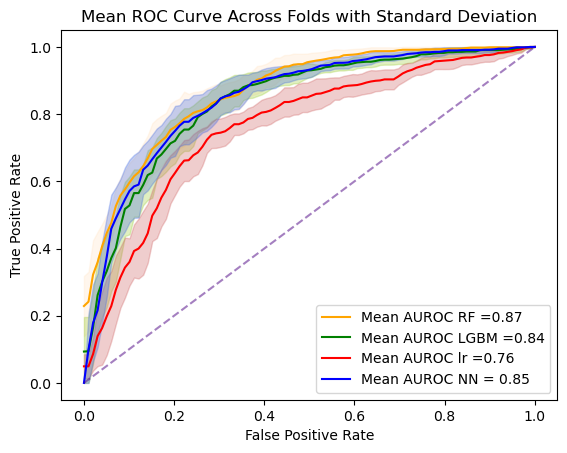

In [5]:
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.optimizers import Adam
from sklearn.metrics import auc, roc_curve

lr = joblib.load('random_lr.pkl')
rf = joblib.load('random_RF.pkl')
lgbm = joblib.load('random_lgbm.pkl')

#set up plotting area
plt.figure(0).clf()

# Lists to store values for plotting
all_tpr_rf = []
all_fpr_rf = []

# Lists to store values for LGBM
all_tpr_lgbm = []
all_fpr_lgbm = []

# Lists to store values for LR
all_tpr_lr = []
all_fpr_lr = []

# Lists to store values for nn
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
fold_aurocs = []

# Iterate through folds
for i, (train_idx, test_idx) in enumerate(cv.split(x, y)):
    # Train the RF model on the current fold
    rf.fit(x.iloc[train_idx], y.iloc[train_idx])

    # Train the LGBM model on the current fold
    lgbm.fit(x.iloc[train_idx], y.iloc[train_idx])

    # Train the LR model on the current fold
    lr.fit(x.iloc[train_idx], y.iloc[train_idx])
    
    # Create the NN model on the current fold
    nn = create_attention_model(input_dim=x.shape[1])
    
    # Train the NN model on the current fold
    nn.fit(x.iloc[train_idx],y.iloc[train_idx],epochs=10, batch_size=32, verbose=0)
    
    # Predict probabilities on the test set for RF
    y_scores_rf = rf.predict_proba(x.iloc[test_idx])[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y.iloc[test_idx], y_scores_rf)

    # Predict probabilities on the test set for LGBM
    y_scores_lgbm = lgbm.predict_proba(x.iloc[test_idx])[:, 1]
    fpr_lgbm, tpr_lgbm, _ = roc_curve(y.iloc[test_idx], y_scores_lgbm)

    # Predict probabilities on the test set for lr
    y_scores_lr = lr.predict_proba(x.iloc[test_idx])[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y.iloc[test_idx], y_scores_lr)
    
    # Predict probabilities on the test set for nn
    y_scores = nn.predict(x.iloc[test_idx])
    fpr, tpr, _ = roc_curve(y.iloc[test_idx], y_scores)
    

    # Append to lists for mean calculation
    all_tpr_rf.append(np.interp(np.linspace(0, 1, 100), fpr_rf, tpr_rf))
    all_fpr_rf.append(np.linspace(0, 1, 100))

    all_tpr_lgbm.append(np.interp(np.linspace(0, 1, 100), fpr_lgbm, tpr_lgbm))
    all_fpr_lgbm.append(np.linspace(0, 1, 100))
    
    all_tpr_lr.append(np.interp(np.linspace(0, 1, 100), fpr_lr, tpr_lr))
    all_fpr_lr.append(np.linspace(0, 1, 100))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    all_tpr.append(interp_tpr)

# Calculate mean and standard deviation for RF
mean_tpr_rf = np.mean(all_tpr_rf, axis=0)
mean_fpr_rf = np.mean(all_fpr_rf, axis=0)
std_tpr_rf = np.std(all_tpr_rf, axis=0)

# Plot the mean ROC curve for RF
mean_auc_value_rf = auc(mean_fpr_rf, mean_tpr_rf)
plt.plot(mean_fpr_rf, mean_tpr_rf, color='orange', label=f'Mean AUROC RF ={mean_auc_value_rf:.2f}')

# Fill the area between upper and lower TPR for RF
tpr_upper_rf = np.minimum(mean_tpr_rf + std_tpr_rf, 1)
tpr_lower_rf = np.maximum(mean_tpr_rf - std_tpr_rf, 0)
plt.fill_between(mean_fpr_rf, tpr_lower_rf, tpr_upper_rf, color='bisque', alpha=0.3)


# Calculate mean and standard deviation for LGBM
mean_tpr_lgbm = np.mean(all_tpr_lgbm, axis=0)
mean_fpr_lgbm = np.mean(all_fpr_lgbm, axis=0)
std_tpr_lgbm = np.std(all_tpr_lgbm, axis=0)

# Plot the mean ROC curve for LGBM
mean_auc_value_lgbm = auc(mean_fpr_lgbm, mean_tpr_lgbm)
plt.plot(mean_fpr_lgbm, mean_tpr_lgbm, color='g', label=f'Mean AUROC LGBM ={mean_auc_value_lgbm:.2f}')

# Fill the area between upper and lower TPR for LGBM
tpr_upper_lgbm = np.minimum(mean_tpr_lgbm + std_tpr_lgbm, 1)
tpr_lower_lgbm = np.maximum(mean_tpr_lgbm - std_tpr_lgbm, 0)
plt.fill_between(mean_fpr_lgbm, tpr_lower_lgbm, tpr_upper_lgbm, color='yellowgreen', alpha=0.3)


# Calculate mean and standard deviation for LR
mean_tpr_lr = np.mean(all_tpr_lr, axis=0)
mean_fpr_lr = np.mean(all_fpr_lr, axis=0)
std_tpr_lr = np.std(all_tpr_lr, axis=0)

# Plot the mean ROC curve for LR
mean_auc_value_lr = auc(mean_fpr_lr, mean_tpr_lr)
plt.plot(mean_fpr_lr, mean_tpr_lr, color='r', label=f'Mean AUROC lr ={mean_auc_value_lr:.2f}')

# Fill the area between upper and lower TPR for LR
tpr_upper_lr = np.minimum(mean_tpr_lr + std_tpr_lr, 1)
tpr_lower_lr = np.maximum(mean_tpr_lr - std_tpr_lr, 0)
plt.fill_between(mean_fpr_lr, tpr_lower_lr, tpr_upper_lr, color='indianred', alpha=0.3)


# Calculate mean and standard deviation for NN
mean_tpr = np.mean(all_tpr, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(fold_aurocs)
std_tpr = np.std(all_tpr,axis=0)

# Plot the mean ROC curve for NN
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean AUROC NN = {mean_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='indigo', alpha=0.5)

# Fill the area between upper and lower TPR
tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
tpr_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='royalblue', alpha=0.3)


# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve Across Folds with Standard Deviation')
plt.legend()

plt.show()


# AUPRC

[LightGBM] [Info] Number of positive: 856, number of negative: 809
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514114 -> initscore=0.056471
[LightGBM] [Info] Start training from score 0.056471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 856, number of negative: 809
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2911
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514114 -> initscore=0.056471
[LightGBM] [Info] Start training from score 0.056471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 1ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2914
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step
[LightGBM] [Info] Number of positive: 857, number of negative: 808
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2911
[LightGBM] [Info] Number of data points in the train set: 1665, number of used features: 1032
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514715 -> initscore=0.058876
[LightGBM] [Info] Start training from score 0.058876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

C:\Users\llsoy\AppData\Local\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


6/6 [==============================] - 0s 2ms/step


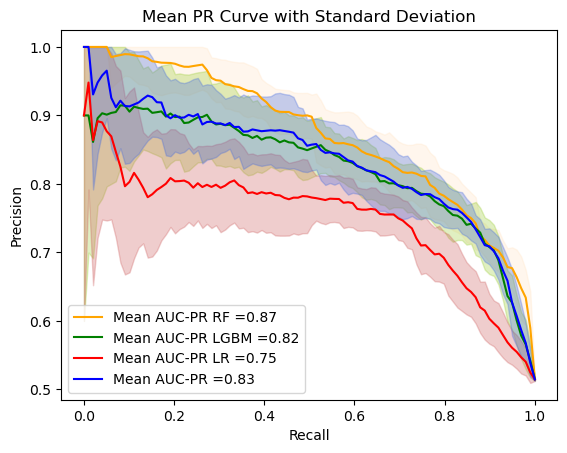

In [6]:
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from keras.optimizers import Adam


lr = joblib.load('random_lr.pkl')
rf = joblib.load('random_RF.pkl')
lgbm = joblib.load('random_lgbm.pkl')


#set up plotting area
plt.figure(0).clf()

# Lists to store values for plotting
all_precision_rf = []
all_recall_rf = []

# Lists to store values for LGBM
all_precision_lgbm = []
all_recall_lgbm = []

# Lists to store values for LR
all_precision_lr = []
all_recall_lr = []

# Lists to store values for nn
mean_fpr = np.linspace(0, 1, 100)
all_precision = []
all_recall = []

# Iterate through folds
for i, (train_idx, test_idx) in enumerate(cv.split(x, y)):
    # Train the RF model on the current fold
    rf.fit(x.iloc[train_idx], y.iloc[train_idx])

    # Train the LGBM model on the current fold
    lgbm.fit(x.iloc[train_idx], y.iloc[train_idx])

    # Train the LR model on the current fold
    lr.fit(x.iloc[train_idx], y.iloc[train_idx])
    
    #Create the NN model on the current fold
    model = create_attention_model(input_dim=x.shape[1])
    
    # Train the NN model on the current fold
    model.fit(x.iloc[train_idx],y.iloc[train_idx],epochs=10, batch_size=32, verbose=0)
    
    # Predict probabilities on the test set for RF
    y_scores_rf = rf.predict_proba(x.iloc[test_idx])[:, 1]
    precision_rf, recall_rf, _ = precision_recall_curve(y.iloc[test_idx], y_scores_rf)
    
    # Predict probabilities on the test set for LGBM
    y_scores_lgbm = lgbm.predict_proba(x.iloc[test_idx])[:, 1]
    precision_lgbm, recall_lgbm, _ = precision_recall_curve(y.iloc[test_idx], y_scores_lgbm)
    
    # Predict probabilities on the test set for lr
    y_scores_lr = lr.predict_proba(x.iloc[test_idx])[:, 1]
    precision_lr, recall_lr, _ = precision_recall_curve(y.iloc[test_idx], y_scores_lr)
    
    # Predict probabilities on the test set for nn
    y_scores = model.predict(x.iloc[test_idx])
    precision, recall, _ = precision_recall_curve(y.iloc[test_idx], y_scores)
    

    # Append to lists for mean calculation
    all_precision_rf.append(np.interp(np.linspace(0, 1, 100), recall_rf[::-1], precision_rf[::-1]))
    all_recall_rf.append(np.linspace(0, 1, 100))

    all_precision_lgbm.append(np.interp(np.linspace(0, 1, 100), recall_lgbm[::-1], precision_lgbm[::-1]))
    all_recall_lgbm.append(np.linspace(0, 1, 100))
    
    all_precision_lr.append(np.interp(np.linspace(0, 1, 100), recall_lr[::-1], precision_lr[::-1]))
    all_recall_lr.append(np.linspace(0, 1, 100))
    
    all_precision.append(np.interp(np.linspace(0, 1, 100), recall[::-1], precision[::-1]))
    all_recall.append(np.linspace(0, 1, 100))

# Calculate mean and standard deviation for RF
mean_precision_rf = np.mean(all_precision_rf, axis=0)
mean_recall_rf = np.mean(all_recall_rf, axis=0)
std_precision_rf = np.std(all_precision_rf, axis=0)

# Plot the mean ROC curve for RF
mean_aucpr_value_rf = auc(mean_recall_rf, mean_precision_rf)
plt.plot(mean_recall_rf, mean_precision_rf, color='orange', label=f'Mean AUC-PR RF ={mean_aucpr_value_rf:.2f}')

# Fill the area between upper and lower TPR for RF
precision_upper_rf = np.minimum(mean_precision_rf + std_precision_rf, 1)
precision_lower_rf = np.maximum(mean_precision_rf - std_precision_rf, 0)
plt.fill_between(mean_recall_rf, precision_lower_rf, precision_upper_rf, color='bisque', alpha=0.3)


# Calculate mean and standard deviation for LGBM
mean_precision_lgbm = np.mean(all_precision_lgbm, axis=0)
mean_recall_lgbm = np.mean(all_recall_lgbm, axis=0)
std_precision_lgbm = np.std(all_precision_lgbm, axis=0)

# Plot the mean ROC curve for LGBM
mean_aucpr_value_lgbm = auc(mean_recall_lgbm, mean_precision_lgbm)
plt.plot(mean_recall_lgbm, mean_precision_lgbm, color='g', label=f'Mean AUC-PR LGBM ={mean_aucpr_value_lgbm:.2f}')

# Fill the area between upper and lower TPR for LGBM
precision_upper_lgbm = np.minimum(mean_precision_lgbm + std_precision_lgbm, 1)
precision_lower_lgbm = np.maximum(mean_precision_lgbm - std_precision_lgbm, 0)
plt.fill_between(mean_recall_lgbm, precision_lower_lgbm, precision_upper_lgbm, color='yellowgreen', alpha=0.3)


# Calculate mean and standard deviation for LR
mean_precision_lr = np.mean(all_precision_lr, axis=0)
mean_recall_lr = np.mean(all_recall_lr, axis=0)
std_precision_lr = np.std(all_precision_lr, axis=0)

# Plot the mean ROC curve for LR
mean_aucpr_value_lr = auc(mean_recall_lr, mean_precision_lr)
plt.plot(mean_recall_lr, mean_precision_lr, color='r', label=f'Mean AUC-PR LR ={mean_aucpr_value_lr:.2f}')

# Fill the area between upper and lower TPR for LR
precision_upper_lr = np.minimum(mean_precision_lr + std_precision_lr, 1)
precision_lower_lr = np.maximum(mean_precision_lr - std_precision_lr, 0)
plt.fill_between(mean_recall_lr, precision_lower_lr, precision_upper_lr, color='indianred', alpha=0.3)


# Calculate mean and standard deviation for NN
mean_precision = np.mean(all_precision, axis=0)
mean_recall = np.mean(all_recall, axis=0)
std_precision = np.std(all_precision, axis=0)

# Plot the mean PR curve
mean_auc_pr = auc(mean_recall, mean_precision)
plt.plot(mean_recall, mean_precision, color='b', label=f'Mean AUC-PR ={mean_auc_pr:.2f}')

# Fill the area between upper and lower Precision
precision_upper = np.minimum(mean_precision + std_precision, 1)
precision_lower = np.maximum(mean_precision - std_precision, 0)
plt.fill_between(mean_recall, precision_lower, precision_upper, color='royalblue', alpha=0.3)


# Add labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Mean PR Curve with Standard Deviation')
plt.legend(loc='lower left')

plt.show()
